<a href="https://colab.research.google.com/github/bhavi289/DL-GANs/blob/master/DL_Assign2_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q tensorflow-gpu==2.0.0-alpha0
import tensorflow as tf

    100% |████████████████████████████████| 332.1MB 42kB/s 
    100% |████████████████████████████████| 419kB 11.3MB/s 
    100% |████████████████████████████████| 61kB 22.4MB/s 
    100% |████████████████████████████████| 3.0MB 7.7MB/s 


In [0]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf

In [5]:
tf.__version__

'1.13.1'

In [0]:
# Load the Drive helper and mount
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
import os
from sklearn.model_selection import train_test_split
import tensorflow.keras.layers as layers # Keras layers API
import tensorflow.keras.models as models # Keras layers API
import tensorflow.keras.optimizers as Adam # Keras layers API


from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
dataset_path = 'drive/My Drive/DL Assign2 GAN Dataset/faces94/'

In [0]:
import PIL
flag = 0
# X, y = '', ''
X = []
i = 0
for root, directories, files in os.walk(dataset_path):
#   print (f"{root}\n\n, Here{_}\n\n, {files}\n")
  
  for file in files:
    try:
        file_path = root + '/' + file
#         print (file_path)
        extension_list = ['jpg', 'jpeg', 'png', 'svg']
        i += 1
        if (file_path.split('.')[-1] in extension_list):
#           X.append(file_path)
        # class is dependent variable. Taken from folder name where images are kept
        # ground_truth = int(file_path.strip().split('/')[-2]) -1
          
          img = PIL.Image.open( file_path )
          img = img.resize((128, 128))
          img.load()
          image = np.asarray( img, dtype="int32" )
          
#           print (file_path)
#           im = matplotlib.pyplot.imread(file_path)
#           image = np.array(im)
          if flag == 0:
            flag = 1
            X = np.array([image])
          else:
            X = np.append(X, [image], axis=0)
    except Exception as e:
        print (e)   
        pass

# data, labels = np.arange(10).reshape((5, 2)), range(5)
# data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.20, random_state=42)

# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print ("success")
print (len(X))

In [0]:
# Helper function to load image
import PIL
def load_image( infilename ) :
    img = PIL.Image.open( infilename )
#     print ((img))
#     print (np.array(img).shape)
#     img = img.resize((64,64))
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

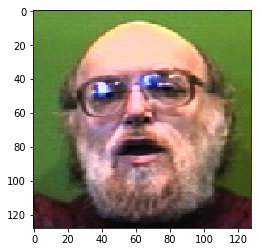

In [0]:

plt.imshow((X[3000]), interpolation='nearest')
plt.show()

In [0]:
 X.shape

(3059, 128, 128, 3)

In [0]:
from sklearn import preprocessing
X_train = X/255
# print (X_train)

In [0]:
X_train.shape

(3059, 128, 128, 3)

In [0]:
input_img = layers.Input(shape=(128, 128, 3))

x = layers.Conv2D(8, (5, 5), strides=2, padding='same')(input_img)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (5, 5), strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (5, 5), strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Conv2D(64, (5, 5), strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Conv2D(100, (4, 4), strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
encoded = layers.Activation('relu')(x)

# encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2DTranspose(64, (4, 4), padding='same')(encoded)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# x = layers.UpSampling2D((2, 2))(x) 
x = layers.Conv2DTranspose(32, (6, 6), strides=2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# x = layers.UpSampling2D((2, 2))(x) 
x = layers.Conv2DTranspose(16, (6, 6), strides=2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# x = layers.UpSampling2D((2, 2))(x) 
x = layers.Conv2DTranspose(8, (7, 7), strides=2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# x = layers.UpSampling2D((2, 2))(x) 
x = layers.Conv2DTranspose(8, (7, 7), strides=2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# x = layers.UpSampling2D((2, 2))(x) 
x = layers.Conv2DTranspose(3, (8, 8), strides=2,padding='same')(x)
decoded = layers.BatchNormalization()(x)
# decoded = layers.Activation('relu')(x)

# x = layers.UpSampling2D((2, 2))(x)
# x = layers.Conv2D(64, (3, 3), padding='same')(x)
# x = layers.BatchNormalization()(x)
# x = layers.Activation('relu')(x)
# x = layers.UpSampling2D((2, 2))(x)
# x = layers.Conv2D(3, (3, 3), padding='same')(x)
# x = layers.BatchNormalization()(x)
# decoded = layers.Activation('sigmoid')(x)

In [0]:
model = models.Model(input_img, decoded)
model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
X.shape

(3059, 128, 128, 3)

In [0]:
X_train.shape

(3059, 128, 128, 3)

In [0]:
model.fit(X_train, X_train,
          epochs=50,
          batch_size=32,
          shuffle=True,
          )

Epoch 1/50
3059/3059 [==============================] - 7s 2ms/sample - loss: 0.7536
Epoch 2/50
3059/3059 [==============================] - 6s 2ms/sample - loss: 0.5058
Epoch 3/50
3059/3059 [==============================] - 6s 2ms/sample - loss: 0.3686
Epoch 4/50
3059/3059 [==============================] - 7s 2ms/sample - loss: 0.2683
Epoch 5/50
3059/3059 [==============================] - 7s 2ms/sample - loss: 0.1937
Epoch 6/50
3059/3059 [==============================] - 7s 2ms/sample - loss: 0.1388
Epoch 7/50
3059/3059 [==============================] - 6s 2ms/sample - loss: 0.0981
Epoch 8/50
3059/3059 [==============================] - 7s 2ms/sample - loss: 0.0685
Epoch 9/50
3059/3059 [==============================] - 7s 2ms/sample - loss: 0.0470
Epoch 10/50
3059/3059 [==============================] - 7s 2ms/sample - loss: 0.0322
Epoch 11/50
3059/3059 [==============================] - 7s 2ms/sample - loss: 0.0219
Epoch 12/50
3059/3059 [==============================] - 7s 2ms

In [0]:
encoder = models.Model(input_img, encoded)

W0410 19:08:51.634275 140594985674624 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0410 19:08:51.677425 140594985674624 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0410 19:08:51.719294 140594985674624 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0410 19:08:51.764563 140594985674624 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0410 19:08:51.808730 140594985674624 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0410 19:08:51.850624 140594985674624 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0410 19:08:51.896311 140594

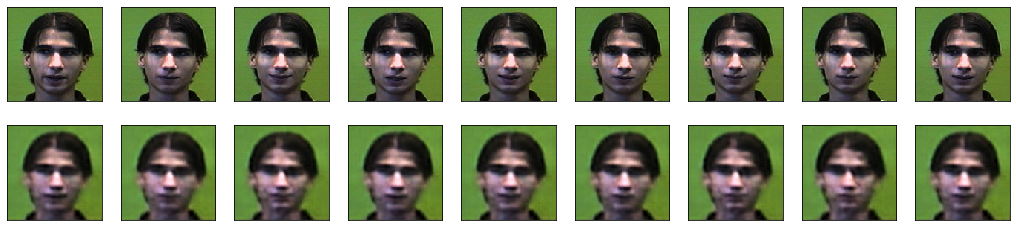

In [0]:
# decoded_imgs = model.predict(X_train)

# # decoded_imgs[0]

# n = 10
# plt.figure(figsize=(20, 4))
# for i in range(1,n):
#     # display original
#     ax = plt.subplot(2, n, i)
#     plt.imshow(X_train[i].reshape(128, 128, 3))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)

#     # display reconstruction
#     ax = plt.subplot(2, n, i + n)
#     plt.imshow((decoded_imgs[i]))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# plt.show()

W0410 19:06:50.623857 140594985674624 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0410 19:06:50.663858 140594985674624 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0410 19:06:50.734546 140594985674624 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0410 19:06:50.771907 140594985674624 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0410 19:06:50.809566 140594985674624 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0410 19:06:50.849812 140594985674624 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0410 19:06:50.889575 140594

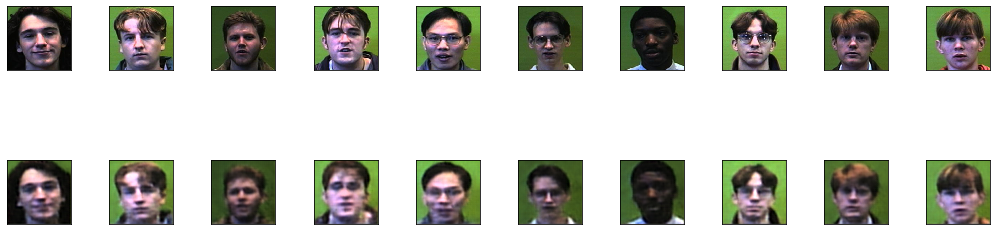

In [0]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(X_train.shape[0], size=num_images)

encoded_imgs = encoder.predict(X_train)
decoded_imgs = model.predict(X_train)

# print (encoded_imgs[0].shape, encoded_imgs[0])

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(X[image_idx])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
#     ax = plt.subplot(3, num_images, num_images + i + 1)
#     plt.imshow(encoded[image_idx].reshape(8, 4))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# ** -----------------------------------**